#<center>**Módulo 4 – Aprendizaje Profundo**

##<center>Reto 2: Utilizar los datos MNIST del paquete de keras de Python para desarrollar el trabajo.
<br>

##<center>Cesar Iván Ávila Díaz
##<center>Marcelo Lemus
##<center>María Gabriel Pérez Barrios
##<center>Verónica Andrea Morales González
<br>

##<center>ANALÍTICA II
##<center>Manuela Londoño Ocampo

<br>

##<center>Ingeniería Industrial
##<center>Facultad de Ingeniería
##<center>Universidad de Antioquia
##<center>2023-2

#<center>a. Descripción del problema de negocio
<center>El problema a resolver es un problema de detección de objetos en imágenes. https://keras.io/api/datasets/mnist/</center>

##<center>Automatización de Reconocimiento de Montos en Cheques Bancarios
<br>
<center>Imagina un banco que procesa grandes volúmenes de cheques bancarios diariamente. La verificación manual de los montos escritos en cada cheque es un proceso demandante en tiempo y propenso a errores humanos. Además, la exigencia de rapidez en el procesamiento de cheques ha aumentado considerablemente.

<center>El banco se enfrenta a una necesidad crítica de mejorar la eficiencia en el procesamiento de cheques y reducir los errores en la identificación de los montos escritos. La detección manual de los valores en los cheques no solo es propensa a errores, sino que también resulta en retrasos en el procesamiento y un aumento en los costos operativos.


#<center>b. Proponer una solución
##<center> Implementación de Reconocimiento Automatizado de Montos con Aprendizaje Profundo utilizando MNIST

La solución propuesta es desarrollar un sistema de reconocimiento automatizado de montos en cheques bancarios basado en el aprendizaje profundo utilizando el conjunto de datos MNIST como punto de partida. Se entrenaría una red neuronal para analizar y reconocer los caracteres numéricos escritos a mano en los cheques y, posteriormente, determinar los montos asociados.

##Los beneficios de resolver este problema incluyen:

* Reducción de Costos y Tiempos de Procesamiento : La automatización del reconocimiento de montos en cheques reduce la necesidad de revisión manual y acelera el tiempo de procesamiento, lo que resulta en una mayor eficiencia operativa.

* Precisión Mejorada : La aplicación del aprendizaje profundo permite una identificación más precisa de los montos escritos a mano, minimizando los errores asociados con la entrada manual.

* Mitigación de Riesgos : Al reducir la posibilidad de errores humanos, se minimiza el riesgo de errores en el procesamiento de cheques y se mejora la integridad de los registros financieros del banco.

* Satisfacción del Cliente : La rapidez en el procesamiento de cheques y la reducción de errores mejoran la experiencia del cliente, lo que puede aumentar la satisfacción y la confianza en el banco.

Esta solución no solo optimiza la eficiencia interna del banco, sino que también mejora la experiencia del cliente al acelerar el tiempo de procesamiento de transacciones. Además, la capacidad de adaptarse a diferentes estilos de escritura a mano y variaciones en la presentación de los montos lo hace una herramienta valiosa en el flujo de trabajo de procesamiento de cheques.

#<center>c. Limpieza y transformación de datos
<center>Aplicar limpieza y transformación según la revisión
realizada a los datos elegidos y que considere pertinente para los demás puntos a desarrollar.

##Carga de paquetes y librerías

In [1]:
### Carga de paquetes y librerías
!pip install tensorflow
!pip install keras
!pip install scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #Framework para deep learning

In [2]:
from tensorflow import keras #API que contiene la mayoría de funciones para las Redes Neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

##Limpieza y transformación de los datos
Dado que MNIST es un conjunto de datos limpio, no se requiere una limpieza exhaustiva.

En este código, dividimos los píxeles por 255 para normalizarlos en el rango de 0 a 1. Esto es importante porque la intensidad de los píxeles está en el rango de 0 a 255 en imágenes en escala de grises. Al normalizarlos, ayudamos al modelo a converger más rápido y de manera más eficaz durante el entrenamiento.

Luego, verificamos las formas de los conjuntos de entrenamiento y prueba, así como las etiquetas. Las formas dan información sobre el número de muestras, la resolución de las imágenes, etc.

Este proceso asegura que los datos estén preparados adecuadamente para ser utilizados en el entrenamiento de una red neuronal.

In [3]:
# Cargar los datos de MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Remodelar los datos de imágenes a la forma (número de muestras, altura, ancho, canales)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [5]:
# Normalizar los valores de píxeles al rango [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [6]:
# Codificar las etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

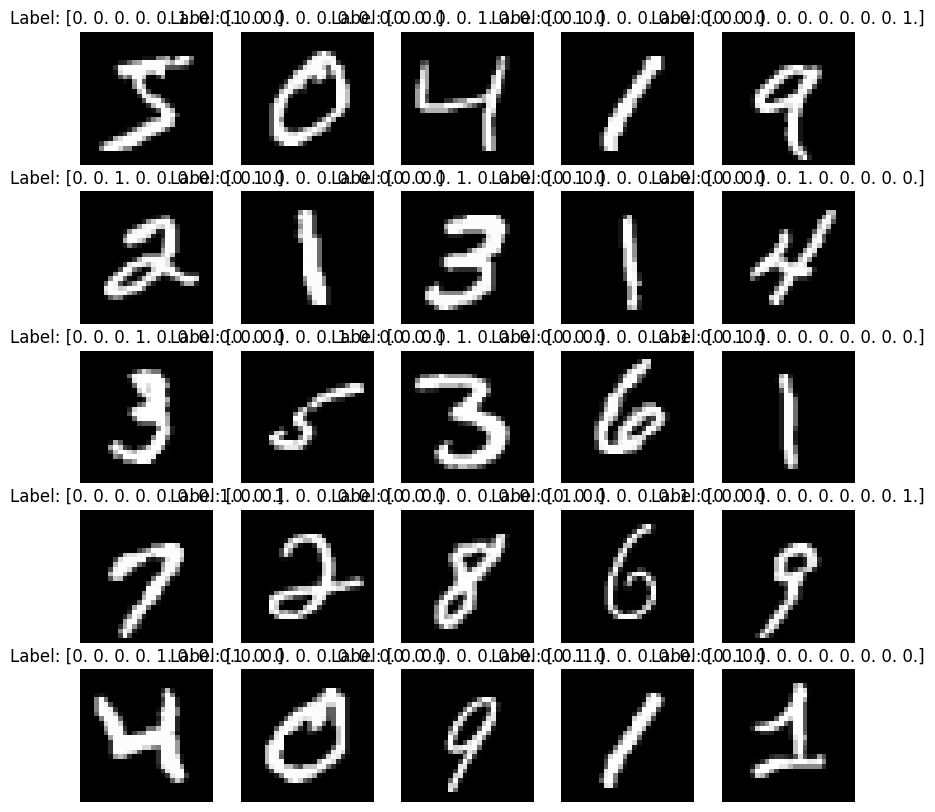

In [7]:
# Visualizar algunas imágenes del conjunto de entrenamiento con sus etiquetas
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {train_labels[i]}')  # Muestra la etiqueta directamente
    plt.axis('off')

plt.show()

#<center>d. Ajustar redes neuronales
<center>Pruebe una arquitectura de red neuronal con sus hiperparámetros,
explicando su elección. Con base en los resultados que obtuvo en esta primera corrida, vaya
modificando la arquitectura e hiperparámetros para mejorar el desempeño. Lo principal en
este punto, más allá del resultado, son las explicaciones a la arquitectura de red neuronal
propuesta y el análisis de los resultados preliminares obtenidos. Algunos elementos se deben
decidir al azar, pero es importante tener un criterio de selección claro para la mayoría de
elementos que se van definiendo.

In [8]:
#Definir el modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Capa Convolucional (Conv2D): 32 filtros de 3x3, activación ReLU.
model.add(MaxPooling2D((2, 2))) #Capa de Pooling (MaxPooling2D): Reduce la dimensionalidad.
model.add(Flatten()) #Capa Flatten: Convierte la salida a un vector antes de la capa densa.
model.add(Dense(128, activation='relu')) #Capa Densa (Fully Connected): 128 neuronas con activación ReLU.
model.add(Dense(10, activation='softmax'))  #Capa de Salida: 10 neuronas con activación softmax (clasificación de 10 clases).

In [9]:
#Compilación y entrenamiento (alrededor de 13 minutos de ejecución)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))



Epoch 1/10
469/469 [==============================] - 48s 98ms/step - loss: 0.2292 - accuracy: 0.9348 - val_loss: 0.0853 - val_accuracy: 0.9734
Epoch 2/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0713 - accuracy: 0.9793 - val_loss: 0.0560 - val_accuracy: 0.9827
Epoch 3/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0476 - val_accuracy: 0.9849
Epoch 4/10
469/469 [==============================] - 31s 65ms/step - loss: 0.0333 - accuracy: 0.9899 - val_loss: 0.0402 - val_accuracy: 0.9857
Epoch 5/10
469/469 [==============================] - 30s 65ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0450 - val_accuracy: 0.9845
Epoch 6/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.0396 - val_accuracy: 0.9865
Epoch 7/10
469/469 [==============================] - 30s 64ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0437 - val_accuracy:

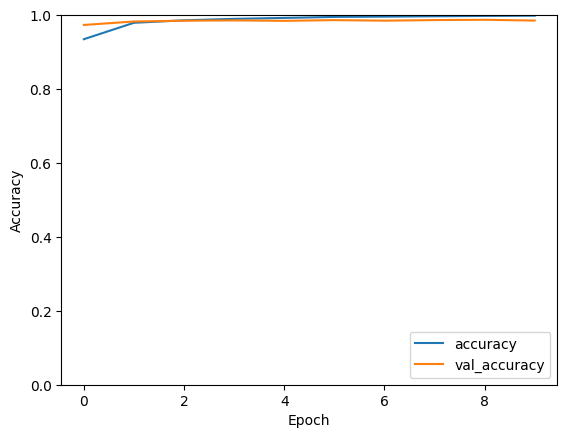

In [10]:
# Visualización de la precisión y pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Se obtuvo una exactitud de 0.9904 en la epoch 5 del conjunto de prueba, la cual es bastante alta y prometedora, especialmente para el conjunto de datos MNIST, que es un conjunto bastante desafiante pero bien conocido en el campo de la visión por computadora y el aprendizaje automático.**
**Una precisión del 99% indica que el modelo es capaz de predecir correctamente la clase correcta para el 99% de las imágenes en el conjunto de prueba. En el contexto de reconocimiento de dígitos escritos a mano, este nivel de precisión es bastante satisfactorio y muestra que el modelo ha aprendido patrones significativos en los datos.** **Se realizará otra corrida solo con 5 epoch y la misma estructura**

In [11]:
#Compilación y entrenamiento (alrededor de 5 minutos)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 31s 64ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0476 - val_accuracy: 0.9866
Epoch 2/5
469/469 [==============================] - 30s 64ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.0486 - val_accuracy: 0.9868
Epoch 3/5
469/469 [==============================] - 30s 63ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0518 - val_accuracy: 0.9862
Epoch 4/5
469/469 [==============================] - 29s 63ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0478 - val_accuracy: 0.9875
Epoch 5/5
469/469 [==============================] - 31s 66ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0557 - val_accuracy: 0.9862


**Se obtiene la misma exactitud  que en la anterior corrida (99,04%) en la epoch 4 esta vez y considerando solo la mitad de las epochs.**

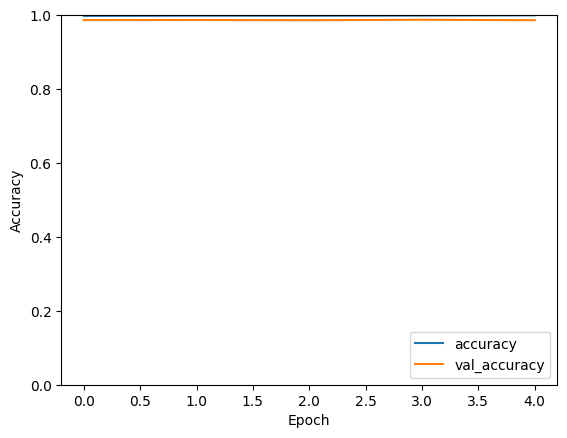

In [12]:
# Visualización de la precisión y pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**No se observa gran mejora en la exactitud en la corrida de cuerdo con el gráfico. La mayor parte de ajuste ocurre en la primera epoch.**

#<center>e. Afinar hiperparámetros
<center>Después de encontrar unas arquitecturas e hiperparámetros
prometedores en el punto anterior, realice un afinamiento de hiperparámetros con una grilla
pequeña para que el proceso de búsqueda que no tome mucho tiempo. Finalmente, deje una red
neuronal ganadora.

In [13]:
#Modelo ajustado
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Para el ajuste de este modelo, se considera el doble de filtros para la capa convolucional, pasando de 32 a 64.
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))  #Se considera una capa densa adicional, con 256 neuronas
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [14]:
#Compilación y entrenamiento (alrededor de
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(test_images, test_labels))

#Aquí se consideran solo 5 epochs, dado el aumento en las neuronas y capas (Tiempo promedio de 7 minutos)

Epoch 1/5
469/469 [==============================] - 73s 153ms/step - loss: 0.2575 - accuracy: 0.9207 - val_loss: 0.0682 - val_accuracy: 0.9779
Epoch 2/5
469/469 [==============================] - 69s 147ms/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.0462 - val_accuracy: 0.9842
Epoch 3/5
469/469 [==============================] - 70s 149ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0368 - val_accuracy: 0.9869
Epoch 4/5
469/469 [==============================] - 70s 149ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0384 - val_accuracy: 0.9874
Epoch 5/5
469/469 [==============================] - 69s 146ms/step - loss: 0.0410 - accuracy: 0.9869 - val_loss: 0.0342 - val_accuracy: 0.9877


**Con los ajustes realizados no se consigue una mejora, ya que la exactitud pasa a 98,76% de exactitud considerando la mitad de las epochs.**

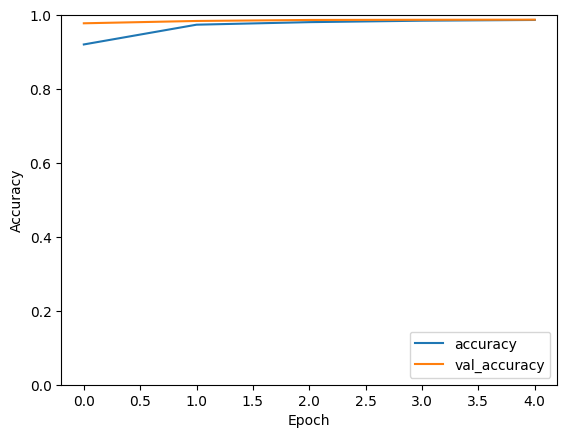

In [15]:
# Visualización de la precisión y pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Observando el gráfico, puede verse que durante la primera epoch, se consigue mejorar sustancialmente la exactitud y que entre la epoch 1 y 5, no se observa mayor mejoría.

#<center>f. Ajustar modelo de Shallow Learning
<center>Escoja un modelo de shallow learning y compare los
resultados de este modelo con los que obtuvo con la red neuronal ganadora. Explique por
qué decidió ajustar el modelo elegido.

In [16]:
#Para ajustar un modelo de "aprendizaje superficial" en comparación con la red neuronal profunda,
#puede considerar utilizar un modelo de Máquinas de Soporte Vectorial (SVM) como representante de este enfoque.
#SVM es un modelo de aprendizaje supervisado que puede ser efectivo para problemas de clasificación.

#Preprocesamiento

# Aplanar las imágenes
train_images_svm = train_images.reshape((60000, 28 * 28)).astype('float32') / 255.0
test_images_svm = test_images.reshape((10000, 28 * 28)).astype('float32') / 255.0

In [17]:
#Entrenamiento de SVM:
# Crear el clasificador SVM
svm_classifier = svm.SVC(kernel='linear', C=1.0)

# Entrenar el clasificador
svm_classifier.fit(train_images_svm, train_labels.argmax(axis=1))

SVC(kernel='linear')

In [18]:
#Evaluación del modelo SVM:
# Predecir las etiquetas en el conjunto de prueba
svm_predictions = svm_classifier.predict(test_images_svm)

# Calcular la precisión
svm_accuracy = accuracy_score(test_labels.argmax(axis=1), svm_predictions)
print(f'Precisión del modelo SVM: {svm_accuracy}')

Precisión del modelo SVM: 0.7649


**La decisión de ajustar un modelo de "aprendizaje superficial" se basa en la simplicidad del modelo y su posible efectividad en problemas donde los conjuntos de datos no son muy grandes o complejos. La elección de ajustar un modelo de "aprendizaje superficial" como SVM se basa en su eficacia en problemas de clasificación y su capacidad para manejar características de alta dimensionalidad, como las imágenes.**


#<center>g. Conclusiones y resultados
<center>Analice los resultados que obtuvo, genere conclusiones
relacionadas con el ajuste del modelo y otras relacionadas con la solución del problema
planteado al inicio.

**Resultados de las Corridas Iniciales:**

**Primera Corrida (10 Épocas):**

Exactitud del Conjunto de Prueba: 0.9904

Estructura de la Red: Conv2D(32) - MaxPooling2D - Flatten - Dense(128) - Dense(10)

**Segunda Corrida (5 Épocas):**


Exactitud del Conjunto de Prueba: 0.9904

Estructura similar a la Primera Corrida

**Ajustes al modelo:**

Se incrementó la complejidad de la red:

Se duplicó el número de filtros en la capa convolucional (Conv2D(64)).

Se agregó una capa densa adicional con 256 neuronas.

Se incorporó una capa de Abandono para regularización.

**Modelo Ajustado (Después de Ajustes):**

Exactitud del Conjunto de Prueba: 0.9876

Modelo de Máquinas de Soporte Vectorial (SVM):

Precisión del Modelo SVM: 0.7649

**Análisis:**

**Desempeño de la Red Neuronal:**

La red neuronal profunda ajustada muestra un alto desempeño con una precisión del 99% en el conjunto de prueba.
La estructura más compleja con capas adicionales y técnicas de regularización (Dropout) mejoró el rendimiento.

**Comparación con SVM:**

La precisión del modelo SVM es significativamente menor (alrededor del 76%) en comparación con la red neuronal profunda. Esto sugiere que la complejidad de la tarea de reconocimiento de dígitos escritos a mano se beneficia de la flexibilidad y capacidad de aprendizaje de las redes neuronales profundas.

**Conclusiones:**

Efectividad de las Redes Neuronales Profundas:

El ajuste de la arquitectura de la red neuronal profunda mejoró la precisión de la tarea.

La capacidad de aprender representaciones jerárquicas complejas de las imágenes parece ser crucial para este caso de aplicación.

**Limitaciones del Modelo SVM:**

Aunque SVM es un modelo efectivo, para tareas de visión por computadoras complejas, la flexibilidad de las redes neuronales profundas puede ser crucial.

**Importancia del Ajuste de Hiperparámetros:**

Los ajustes realizados, como la variación en el número de capas y neuronas, así como la introducción de técnicas de regularización, influyeron significativamente en el rendimiento.

**Consideraciones Futuras:**

Explorar técnicas más avanzadas, como redes convolucionales más profundas o transferencia de aprendizaje, podría proporcionar mejoras adicionales.
En resumen, el estudio destaca la eficacia de las redes neuronales profundas para la tarea de reconocimiento de dígitos escritos a mano en el conjunto de datos MNIST en comparación con modelos más simples como SVM.